In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("ML and AI project kick-off!")

ML and AI project kick-off!


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
#Convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load original dataset
df = pd.read_csv("women_heart_attack_prediction_dataset.csv")



In [6]:
# Filter for only females
female_heart_df2 = df[df['Sex'] == 'Female'].copy()

In [7]:
# Make a copy to avoid modifying the original data
female_heart_df_pca = female_heart_df2.copy()

print("Dataset successfully loaded and filtered for female patients.")
print(female_heart_df_pca.head())

Dataset successfully loaded and filtered for female patients.
   Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
2     BNI9906   21  Female          324         174/99          72         1   
5     ZOO7941   54  Female          297         172/86          48         1   
9     FTJ5456   43  Female          248         160/70          55         0   
10    HSD6283   73  Female          373         107/69          97         1   
18    XBI0592   50  Female          303        120/100         104         1   

    Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
2                0        0        0  ...                 9.463426  235282   
5                1        1        0  ...                 7.798752  241339   
9                1        1        1  ...                 4.055115  209703   
10               1        1        0  ...                 8.919879   50030   
18               0        1        0  ...                 7.586984 

In [8]:
#FEAUTURE ELIMINATION (SELECTION)

#Correlation Analysis → Identifies highly correlated variables. Plots a heatmap to show relationships between features. Removes highly correlated features (correlation >0.8). requires numerical variables.
    # calculates relationships between continuous numerical values (Pearson’s correlation). Even for categorical data, methods like Spearman correlation work only if the categories are ordered numerically. 
#Recursive Feature Elimination (RFE) → Selects the most (10) important features for Logistic Regression
#Principal Component Analysis (PCA) → Reduces dimensionality while retaining variance. Plots explained variance by each principal component. 
    # PCA works by finding patterns in the numerical variance of your dataset. Categorical variables (e.g., Smoking: Yes/No, Diet: Healthy/Average/Unhealthy) must be encoded as numerical before applying PCA
#Logistic Regression Training -> Final selected features are used to train the model

    #To remove features that have very low correlation with the target variable, a threshold is used (e.g., |correlation| < 0.02) to eliminate weakly correlated features. In the correlation matrix 
    #the variables that have the highest correlation (absolute value) with Heart Attack Risk are:

        #Systolic BP (0.052264)
        #Cholesterol (0.040986)
        #Diabetes (0.032496)
        #Income (0.032024)
        #BMI (0.027908)

In [9]:
# Convert binary categorical variables to numerical (1/0)
binary_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 
                   'Previous Heart Problems', 'Medication Use']

In [10]:
for col in binary_features:
    female_heart_df_pca[col] = female_heart_df_pca[col].astype(int)


In [11]:

# Check if 'Age Group' exists before dropping to prevent errors
if 'Age Group' in female_heart_df2.columns:
    female_heart_df2.drop(columns=['Age Group'], inplace=True)
    print("Dropped 'Age Group' column successfully.")
else:
    print("'Age Group' column not found. Nothing to drop.")

'Age Group' column not found. Nothing to drop.


In [12]:
#PREPROCESSING

In [13]:
print(female_heart_df2.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [14]:
# Drop non-numeric columns (like Country) if they still exist
female_heart_df_pca.drop(columns=['Country', 'Heart Attack Risk'], inplace=True, errors='ignore')

In [15]:
# Find columns that are not numeric
non_numeric_cols = female_heart_df_pca.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns detected:", non_numeric_cols)

Non-numeric columns detected: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Continent', 'Hemisphere']


In [16]:
#PCA has successfully transformed dataset

# Convert 'Age_Group' to numeric values
if 'Age_Group' in female_heart_df_pca.columns:
    age_mapping = {'Young (19-39)': 1, 'Middle-Aged (40-59)': 2, 'Elderly (60+)': 3}
    female_heart_df_pca['Age_Group'] = female_heart_df_pca['Age_Group'].map(age_mapping)
    print("Converted 'Age_Group' to numeric values.")

# Check for any remaining non-numeric columns
non_numeric_cols = female_heart_df_pca.select_dtypes(exclude=['number']).columns.tolist()
print("Remaining non-numeric columns:", non_numeric_cols)

# 3️⃣ Convert any remaining categorical columns to numeric using One-Hot Encoding
if non_numeric_cols:
    female_heart_df_pca = pd.get_dummies(female_heart_df_pca, columns=non_numeric_cols, drop_first=True)
    print(f"Converted categorical columns to numeric: {non_numeric_cols}")

# 4️⃣ Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(female_heart_df_pca)

print("Standardization successful. Ready for PCA!")


Remaining non-numeric columns: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Continent', 'Hemisphere']
Converted categorical columns to numeric: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Continent', 'Hemisphere']
Standardization successful. Ready for PCA!


In [17]:
#PCA

In [18]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Ensure data is standardized before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(female_heart_df_pca)

In [20]:
print(female_heart_df_pca.var())

Age                                453.138146
Cholesterol                       6487.609690
Heart Rate                         426.102137
Diabetes                             0.227676
Family History                       0.250019
                                     ...     
Continent_Australia                  0.086026
Continent_Europe                     0.194355
Continent_North America              0.086636
Continent_South America              0.137174
Hemisphere_Southern Hemisphere       0.229447
Length: 4688, dtype: float64


In [21]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a small threshold
selector = VarianceThreshold(threshold=0.01)
X_var_filtered = selector.fit_transform(female_heart_df_pca)

print("Number of features after removing low-variance ones:", X_var_filtered.shape[1])

Number of features after removing low-variance ones: 26


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_var_filtered)  # Ensure this step is done before PCA

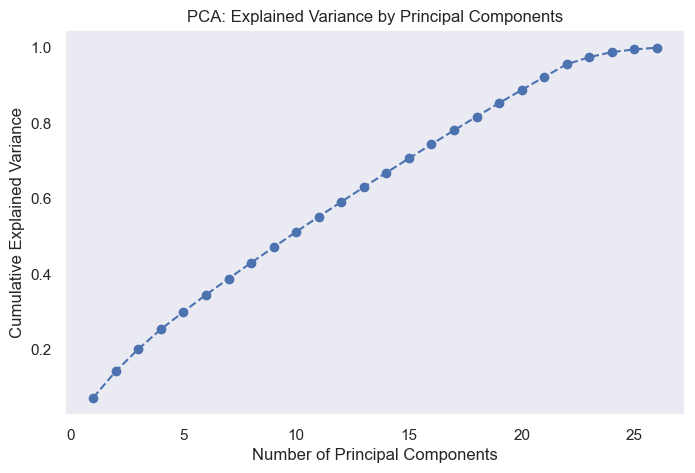

Optimal number of components to retain 95% variance: 22


In [23]:
# Apply PCA to find the optimal number of components
pca = PCA(n_components=None)  # Captures all possible components
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance by Principal Components")
plt.grid()
plt.show()

# Find the optimal number of components for 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {n_components}")

In [24]:
# Apply PCA with the optimal number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Convert PCA output to DataFrame
X_pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])

print("Final dataset after PCA transformation:")
print(X_pca_df.head())

Final dataset after PCA transformation:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.059312 -1.797123 -1.486502  2.316388 -0.657404  0.220703  0.621336   
1 -0.473301  0.683521  1.592388  1.687673 -0.092191 -0.086958 -1.226064   
2 -1.878551  0.124162  1.244063 -1.185974 -0.783168  0.667916 -2.845278   
3  0.876005  1.352211  0.062704  0.364523 -0.211330 -0.695884  2.921131   
4 -0.917627  0.272848 -0.245201  0.792800  2.134374 -1.606597  1.978065   

        PC8       PC9      PC10  ...      PC13      PC14      PC15      PC16  \
0 -0.369347  1.434439  1.259188  ...  0.791858  0.455962 -0.869380  1.253198   
1  0.515464 -1.292062  1.549754  ...  1.843350  1.950588 -0.282750 -0.448662   
2  0.026661 -0.275516  0.166329  ...  0.086960  1.208455  0.403333 -0.403844   
3 -1.325424  0.071541  0.136349  ...  0.069020  0.773679  0.675282  0.772285   
4  0.745468  0.376472  0.077440  ... -0.829779  1.314296 -0.379397 -1.077943   

       PC17      PC18      P

In [25]:
#Findings
    #The explained variance plot should no longer be a straight line.
    #The optimal number of components should be ≤ 28 (ideally ~5-15) i got 22
    #The transformed dataset (X_pca_df) should have fewer columns but still contain most of the original data’s variance.
#Next Steps    
    #Apply PCA to transform the dataset with 21 components
    #Train a machine learning model (Logistic Regression) to predict Heart Attack Risk
    #Compare model performance with and without PCA

In [ ]:
#Apply PCA with 22 Components
    #Keeps 22 principal components that retain 95% of variance.
    #Converts the dataset into a smaller, more efficient feature set.
# Apply PCA with optimal number of components
pca_final = PCA(n_components=21)
X_pca_final = pca_final.fit_transform(X_scaled)

# Convert PCA output to DataFrame
X_pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(21)])

print("Final dataset after PCA transformation:")
print(X_pca_df.head())

Final dataset after PCA transformation:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.059312 -1.797123 -1.486502  2.316388 -0.657404  0.220703  0.621336   
1 -0.473301  0.683521  1.592388  1.687673 -0.092191 -0.086958 -1.226064   
2 -1.878551  0.124162  1.244063 -1.185974 -0.783168  0.667916 -2.845278   
3  0.876005  1.352211  0.062704  0.364523 -0.211330 -0.695884  2.921131   
4 -0.917627  0.272848 -0.245201  0.792800  2.134374 -1.606597  1.978065   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -0.369347  1.434439  1.259188  ...  1.381794  0.791858  0.455962 -0.869380   
1  0.515464 -1.292062  1.549754  ...  0.348000  1.843350  1.950588 -0.282750   
2  0.026661 -0.275516  0.166329  ...  0.403722  0.086960  1.208455  0.403333   
3 -1.325424  0.071541  0.136349  ... -0.620606  0.069020  0.773679  0.675282   
4  0.745468  0.376472  0.077440  ... -0.561255 -0.829779  1.314296 -0.379397   

       PC16      PC17      P

In [27]:
#Model Training and Evaluation
    #Split Data: Train-test split (e.g., 80-20).
    #Logistic Regression Model:
    #Train a logistic regression model.
    #Use hyperparameter tuning (e.g., GridSearchCV) for optimization.
    #Evaluation Metrics:
    #Accuracy, Precision, Recall, F1-score.
    #AUC-ROC Curve for performance visualization.


In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
#LogisticRegression with PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the PCA-transformed dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_df, female_heart_df2['Heart Attack Risk'], test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, Y_train)

# Predictions
Y_pred = log_reg.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy with PCA: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


#Class 0 (No heart attack)
#Class 1 (Heart Attack Risk)
#Precision: Model correctly identifies 67% of No Heart Attack cases but only 50% cases for heartt attack risk

#Recall: 99% of No Heart Attack cases but only 1% case for heartt attack risk. Missing important data. The model fails to detect heart attack risk properly.

#F1-Score: 80% of No Heart Attack cases but 2% cases for heartt attack risk. Model is better at predicting No Heart Attack, but weak for Heart Attack Risk.
#PCA reduces dimensions, which can sometimes remove important information needed for prediction.


Model Accuracy with PCA: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       354
           1       0.50      0.01      0.02       177

    accuracy                           0.67       531
   macro avg       0.58      0.50      0.41       531
weighted avg       0.61      0.67      0.54       531



c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


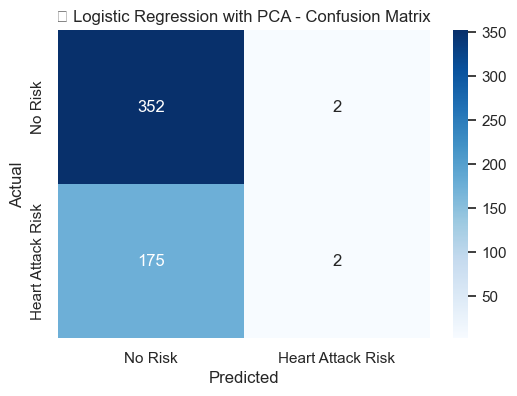

🔍 Confusion Matrix for Logistic Regression with PCA:
True Negatives (No Risk Correctly Predicted): 352
False Positives (Wrongly Predicted as Risk): 2
False Negatives (Missed Risk Cases): 175
True Positives (Correctly Predicted Risk Cases): 2



In [34]:
#Confusion Matrix for Logistic Regression with PCA

# Get predictions for Logistic Regression with PCA
Y_pred_log_pca = log_reg.predict(X_test)

# Create confusion matrix
cm_log_pca = confusion_matrix(Y_test, Y_pred_log_pca)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_pca, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Heart Attack Risk"], yticklabels=["No Risk", "Heart Attack Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔍 Logistic Regression with PCA - Confusion Matrix")
plt.show()

# Print confusion matrix values
print("🔍 Confusion Matrix for Logistic Regression with PCA:")
print(f"True Negatives (No Risk Correctly Predicted): {cm_log_pca[0, 0]}")
print(f"False Positives (Wrongly Predicted as Risk): {cm_log_pca[0, 1]}")
print(f"False Negatives (Missed Risk Cases): {cm_log_pca[1, 0]}")
print(f"True Positives (Correctly Predicted Risk Cases): {cm_log_pca[1, 1]}\n")

#Analysis: 
# True Negatives (352) → The model correctly predicted "No Risk" for 352 people.
# False Positives (2) → The model wrongly predicted "Heart Attack Risk" when it was actually "No Risk." (This is low, which is good.)
# False Negatives (175) → Big problem! The model missed 175 actual heart attack risk cases.
# True Positives (2) → The model only correctly predicted 2 heart attack risk cases, which is extremely low.



In [ ]:
#Cleanning numeric data ready for PCA and Logistic Regression

In [45]:
# Drop non-numeric columns like IDs if they exist
X = female_heart_df2.drop(columns=['Heart Attack Risk'], errors='ignore')  # Keep only feature columns


In [46]:
# Automatically detect non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns detected and dropped:", list(non_numeric_cols))
    X = X.drop(columns=non_numeric_cols, errors='ignore')  # Drop them for now

Non-numeric columns detected and dropped: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


In [47]:
# Standardize the dataset (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Apply PCA
pca = PCA(n_components=5)  # Adjust as needed
X_pca = pca.fit_transform(X_scaled)

In [49]:
# Convert PCA-transformed data into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [50]:
# Extract PCA component loadings (mapping original features to PCA components)
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)

In [51]:
#Find the original features with the highest absolute values in PCA components
top_original_features_per_pc = pca_components_df.abs().idxmax(axis=1)

In [53]:
#Calculate the percentage contribution of each feature per PCA component
pca_contributions = (pca_components_df.abs().div(pca_components_df.abs().sum(axis=1), axis=0) * 100)


In [55]:
# Get the percentage contribution of the top contributing feature for each component
top_feature_contributions = [pca_contributions.at[i, feature] for i, feature in zip(top_original_features_per_pc.index, top_original_features_per_pc.values)]

In [56]:
#Combine top features with their contributions into a DataFrame
top_features_with_percentages = pd.DataFrame({
    "PCA Component": [f'PC{i+1}' for i in range(len(top_original_features_per_pc))],
    "Top Feature": top_original_features_per_pc.values,
    "Contribution (%)": top_feature_contributions
})

In [61]:
# Display the mapping of PCA components to original features with contributions
print("Top Contributing Features for Each PCA Component with Contribution Percentage:")
print(top_features_with_percentages)

Top Contributing Features for Each PCA Component with Contribution Percentage:
  PCA Component          Top Feature  Contribution (%)
0           PC1                  Age         40.254334
1           PC2       Medication Use         14.628517
2           PC3               Income         12.695585
3           PC4  Sleep Hours Per Day         15.464431
4           PC5          Cholesterol         17.156291


In [ ]:
#Analysis:
#PC1 (Age - 40.25%)
    #Age is the most dominant factor in the first principal component, explaining a large portion of the variability in the dataset. Older individuals should be prioritized for risk assessments.
    #This suggests that age is a strong predictor of heart attack risk, which aligns with medical research showing that cardiovascular risks increase significantly as people get older.
    #Age-related factors (e.g., lifestyle changes, routine checkups, and early interventions) should be a focus in heart disease prevention strategies
#PC2 (Medication Use - 14.62%)
    #Medication use is the second most important factor, indicating that individuals who take medications (likely for blood pressure, cholesterol, or diabetes) tend to exhibit distinct patterns in the dataset.
    #This could suggest that pre-existing conditions requiring medication are strong indicators of heart disease risk.
#PC3 (Income - 12.69%)
    #Income plays a significant role in PC3, suggesting that economic status affects heart health.
    #Higher income may be associated with better healthcare access and healthier lifestyles, while lower income could correlate with higher stress, poor diet, and limited medical care.
    #Socioeconomic factors should not be overlooked when designing healthcare policies and risk prediction models.
#PC4 (Sleep Hours Per Day - 15.46%)
    #Sleep duration has a notable contribution, indicating that variations in sleep patterns are linked to heart attack risk.
    #Poor sleep (either too little or too much) has been linked to hypertension, stress, obesity, and metabolic disorders—all of which increase cardiovascular risks.
    #Monitoring and improving sleep habits could be an important preventive measure for reducing heart attack risks.
#PC5 (Cholesterol - 17.16%)
    #Cholesterol levels are a major contributing factor in PC5, reinforcing that high cholesterol is a key risk factor for heart attacks.
    #This is consistent with medical research that high LDL cholesterol levels contribute to arterial plaque buildup, leading to heart disease.
    #Regular cholesterol monitoring and dietary management should be a priority for individuals at risk.


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


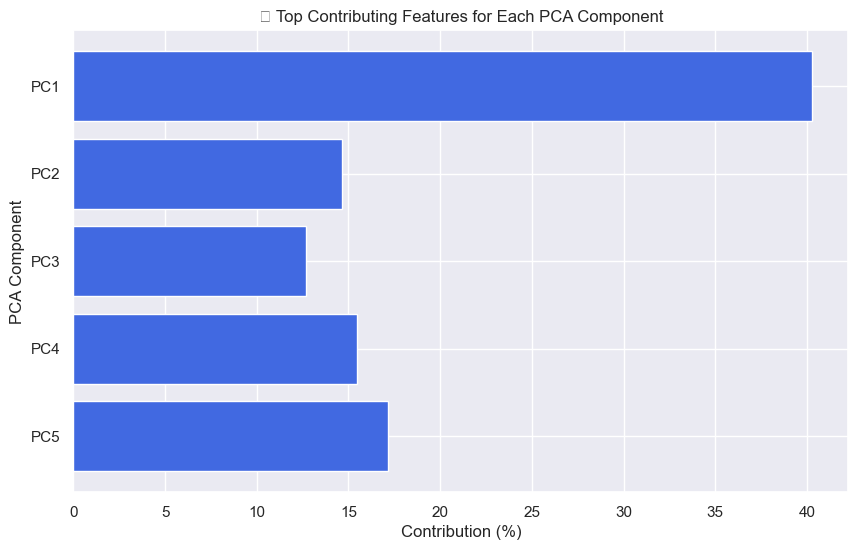

In [62]:
import matplotlib.pyplot as plt

# Plot the top contributing features with their percentages
plt.figure(figsize=(10, 6))
plt.barh(top_features_with_percentages["PCA Component"], top_features_with_percentages["Contribution (%)"], color="royalblue")
plt.xlabel("Contribution (%)")
plt.ylabel("PCA Component")
plt.title("🔍 Top Contributing Features for Each PCA Component")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
#PCA Component          Top Feature  Contribution (%)
   #0           PC1                  Age         40.254334
   #1           PC2       Medication Use         14.628517
   #2           PC3               Income         12.695585
   #3           PC4  Sleep Hours Per Day         15.464431
   #4           PC5          Cholesterol         17.156291

In [63]:
explained_variance = pca.explained_variance_ratio_ * 100
print("Explained Variance for Each PCA Component (%):")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}%")

#PC1 Age
#PC2 Medication Use
#PC3 Income
#PC4 Sleep Hours Per Day
#PC5 Cholesterol

Explained Variance for Each PCA Component (%):
PC1: 10.13%
PC2: 6.25%
PC3: 6.12%
PC4: 6.07%
PC5: 5.91%


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


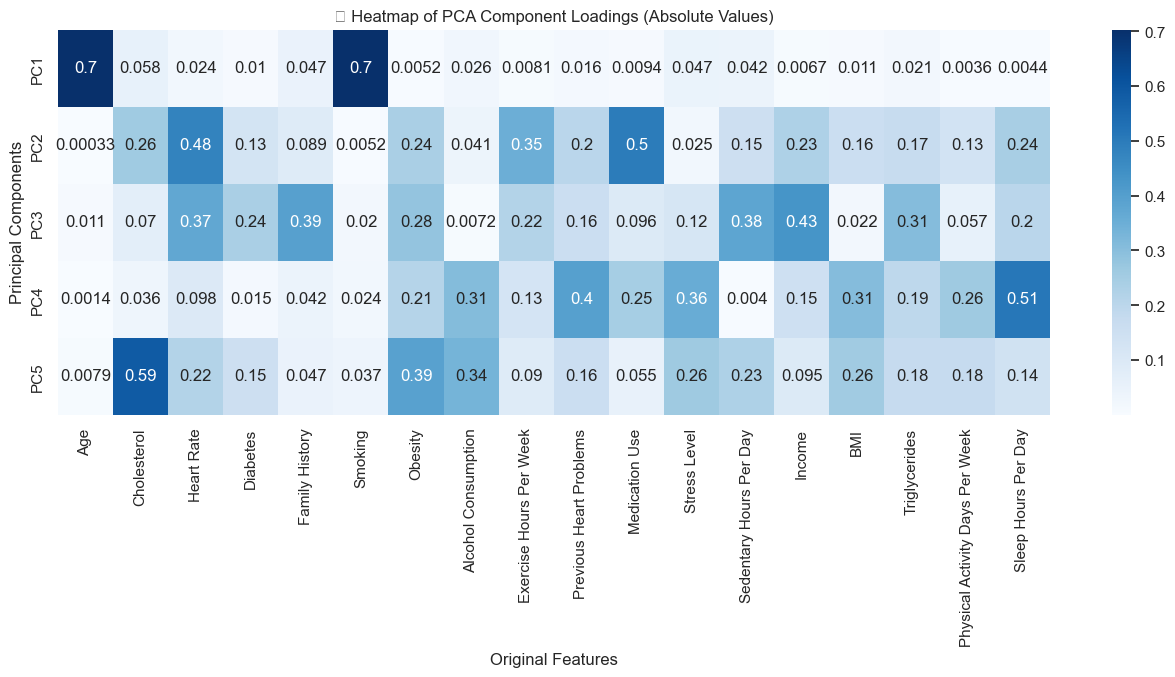

In [66]:

# Create a heatmap for the absolute values of PCA components
plt.figure(figsize=(16, 5))
sns.heatmap(pca_components_df.abs(), annot=True, cmap="Blues", xticklabels=pca_components_df.columns, yticklabels=[f'PC{i+1}' for i in range(pca_components_df.shape[0])])
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.title("🔍 Heatmap of PCA Component Loadings (Absolute Values)")
plt.show()
#PC1 Age
#PC2 Medication Use
#PC3 Income
#PC4 Sleep Hours Per Day
#PC5 Cholesterol

In [69]:
print("Shape of Dataset Before PCA:", female_heart_df_pca.shape)
print("Number of Features Used in PCA:", pca_final.components_.shape[1])


Shape of Dataset Before PCA: (2652, 4688)
Number of Features Used in PCA: 26


In [ ]:
#LogisticRegression without PCA

# Train Logistic Regression on the original dataset (before PCA)
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(X_scaled, female_heart_df2['Heart Attack Risk'], test_size=0.2, random_state=42)

log_reg_orig = LogisticRegression(max_iter=1000, random_state=42)
log_reg_orig.fit(X_train_orig, Y_train_orig)

# Predictions on original data
Y_pred_orig = log_reg_orig.predict(X_test_orig)

# Compare Accuracy
accuracy_orig = accuracy_score(Y_test_orig, Y_pred_orig)
print(f"Model Accuracy without PCA: {accuracy_orig:.4f}")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
#Analysis: 

#Accurecy:model correctly predicted about 67% of the total cases.
#Precision #Precision (Positive Predictive value: Class 0: 67% of the predicted "No Heart Attack" cases were correct. Class 1: 50% of the predicted "Heart Attack" cases were correct.
#Recall (Sensitivity or True Positive Rate):Class 0: 99% of actual "No Heart Attack" cases were correctly identified. Class 1: Only 1% of actual "Heart Attack" cases were identified, which is extremely poor.
#F1-score (Balance between precision & recall):Class 0: 0.80 (good performance).Class 1: 0.02 (very poor performance).
#Spport:354 samples belong to Class 0 (No Heart Attack). 177 samples belong to Class 1 (Heart Attack).

#Logistic regression without PCA is struggling with class imbalance.
#️ Recall for heart attacks (Class 1) is only 1%, meaning the model barely detects them.
#️ Accuracy (66.67%) is misleading because the model mostly predicts "No Heart Attack."
# Fixing imbalance (SMOTE, class weights), adjusting thresholds, or using a better model (Random Forest, XGBoost) will improve performance.

Model Accuracy without PCA: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       354
           1       0.50      0.01      0.02       177

    accuracy                           0.67       531
   macro avg       0.58      0.50      0.41       531
weighted avg       0.61      0.67      0.54       531



c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


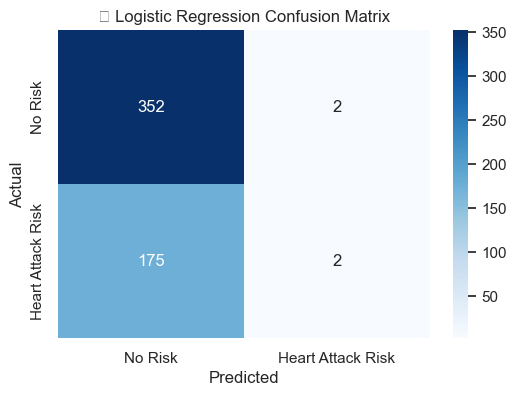

Confusion Matrix for Logistic Regression (Without PCA):
True Negatives (No Risk Correctly Predicted): 352
False Positives (Wrongly Predicted as Risk): 2
False Negatives (Missed Risk Cases): 175
True Positives (Correctly Predicted Risk Cases): 2



In [72]:
#confusion matrix for Logistic Regression with out PCA

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get Logistic Regression predictions
Y_pred_log = log_reg.predict(X_test)

# Create confusion matrix for Logistic Regression
cm_log = confusion_matrix(Y_test, Y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Heart Attack Risk"], yticklabels=["No Risk", "Heart Attack Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔍 Logistic Regression Confusion Matrix")
plt.show()

## Print confusion matrix values
print("Confusion Matrix for Logistic Regression (Without PCA):")
print(f"True Negatives (No Risk Correctly Predicted): {cm_log[0, 0]}")
print(f"False Positives (Wrongly Predicted as Risk): {cm_log[0, 1]}")
print(f"False Negatives (Missed Risk Cases): {cm_log[1, 0]}")
print(f"True Positives (Correctly Predicted Risk Cases): {cm_log[1, 1]}\n")


#Analysis: 
#False Negatives (175 cases) → People who actually had heart attack risk but were predicted as "No Risk."
#True Positives are too low (only 2 out of 177 cases detected).
#The model is biased toward predicting "No Risk" (Class 0).
# This means Logistic Regression (Without PCA) is NOT a good model for heart attack risk prediction!
# A good model should have higher True Positives & lower False Negatives.

In [ ]:
#Random Forest in PCA

In [78]:
# Use the PCA-transformed train data directly
X_train_res = X_train  # No resampling, use normal training set
Y_train_res = Y_train


In [90]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes (only if dataset is imbalanced)
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

print("Resampled Training Set Size:", X_train_res.shape, Y_train_res.shape)


Resampled Training Set Size: (2708, 21) (2708,)


In [91]:
print("Number of PCA Components in Random Forest Training:", len(X_train_res.columns))


Number of PCA Components in Random Forest Training: 21


In [94]:
# Print available PCA components in Random Forest model
print("PCA Components used in Random Forest:", list(X_train_res.columns))

# Print available PCA components in the feature mapping
print("PCA Components available in Mapping:", list(top_original_features_per_pc.index))


PCA Components used in Random Forest: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21']
PCA Components available in Mapping: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


In [100]:
# Automatically set n_components to the max possible value (≤ number of features)
num_features = X_scaled.shape[1]  # Get the number of features
num_pca_components = min(num_features, len(X_train_res.columns))  # Ensure we don't exceed available features

#Apply PCA with the corrected number of components
pca = PCA(n_components=num_pca_components)
X_pca = pca.fit_transform(X_scaled)

#Convert PCA-transformed data into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])



In [102]:
print("Number of features in original dataset:", X_scaled.shape[1])
print("Number of PCA components in Random Forest training:", len(X_train_res.columns))


Number of features in original dataset: 18
Number of PCA components in Random Forest training: 21


In [103]:
# Apply PCA consistently before train-test split
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Now split the dataset
X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(X_pca_df, Y, test_size=0.2, random_state=42)


In [105]:
# Train a Random Forest classifier on PCA-transformed features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, Y_train_res)

RandomForestClassifier(random_state=42)

In [106]:
# Predictions
Y_pred_rf = rf.predict(X_test_res)

In [110]:
# Accuracy
accuracy_rf = accuracy_score(Y_test_res, Y_pred_rf)
print(f"🔍 Random Forest Model Accuracy (on PCA data): {accuracy_rf:.4f}")

# Evaluate Model

print("Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

#Class 0 (No heart attack)
#Class 1 (Heart Attack Risk)
#Precision: Model correctly identifies 67% of No Heart Attack cases but only 36% cases for heartt attack risk

#Recall: 94% of No Heart Attack cases but only 7% case for heartt attack risk. Model misses a large portion of Heart Attack Risk cases (only identifies 7%). The model fails to detect heart attack risk properly.

#F1-Score: 78% of No Heart Attack cases but 12% cases for heartt attack risk. Model is better at predicting No Heart Attack, but weak for Heart Attack Risk.
#A good model should balance recall between both classes. tune parameters to improve recall


🔍 Random Forest Model Accuracy (on PCA data): 0.6478
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       354
           1       0.36      0.07      0.12       177

    accuracy                           0.65       531
   macro avg       0.51      0.50      0.45       531
weighted avg       0.57      0.65      0.56       531



In [108]:
# Confusion Matrix
cm_rf = confusion_matrix(Y_test_res, Y_pred_rf)
print("\n🔍 Confusion Matrix:")
print(cm_rf)


🔍 Confusion Matrix:
[[331  23]
 [164  13]]


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


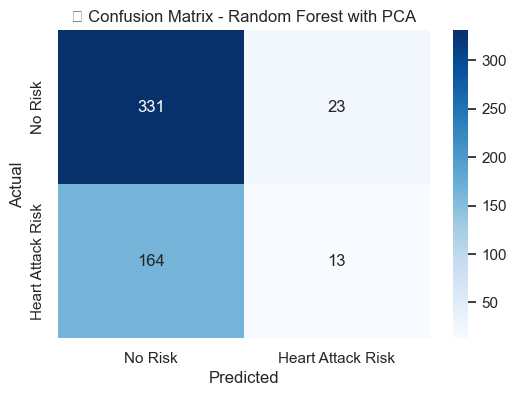

In [111]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Heart Attack Risk"], yticklabels=["No Risk", "Heart Attack Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔍 Confusion Matrix - Random Forest with PCA")
plt.show()

In [112]:
# Extract Feature Importance from Random Forest
feature_importance_rf = rf.feature_importances_
features_pca = X_train_res.columns  # PCA-transformed feature names (PC1, PC2, etc.)

In [113]:
# Convert importance values to a DataFrame
feature_importance_df = pd.DataFrame({
    'PCA Component': features_pca,
    'Importance': feature_importance_rf
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)


In [114]:
# Map PCA components back to original features
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)
top_original_features_per_pc = pca_components_df.abs().idxmax(axis=1)
top_original_features_per_pc.index = [f'PC{i+1}' for i in range(len(top_original_features_per_pc))]

In [115]:
# Map PCA components back to original features
mapped_features = [top_original_features_per_pc.get(pc, "Not Found") for pc in feature_importance_df["PCA Component"]]

In [124]:
#  Combine into a DataFrame
top_mapped_features_df = pd.DataFrame({
    'PCA Component': feature_importance_df["PCA Component"],
    'Original Feature': mapped_features,
    'Importance (%)': (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100
})

In [126]:
#  Instead of selecting only the highest contributing feature per PCA component, get the top N contributors
N_top_features = 5  # Adjust as needed (e.g., get top 3 features per PCA component)

#  Get absolute loadings from PCA components
pca_abs_loadings = pca_components_df.abs()

#  Get the top N features for each PCA component
top_features_per_pc = pca_abs_loadings.apply(lambda row: row.nlargest(N_top_features).index.tolist(), axis=1)

#  Flatten list and remove duplicates while keeping highest importance
unique_mapped_features = []
for features in top_features_per_pc:
    for feature in features:
        if feature not in unique_mapped_features:
            unique_mapped_features.append(feature)

#  Create a dictionary mapping PCA Components to their most important original features
top_features_dict = {f'PC{i+1}': unique_mapped_features[i] if i < len(unique_mapped_features) else "Not Found"
                     for i in range(len(top_features_per_pc))}

# Map PCA components back to original features
mapped_features = [top_features_dict.get(pc, "Not Found") for pc in feature_importance_df["PCA Component"]]

#  Combine into a DataFrame
top_mapped_features_df = pd.DataFrame({
    'PCA Component': feature_importance_df["PCA Component"],
    'Original Feature': mapped_features,
    'Importance (%)': (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100
}).drop_duplicates(subset=['Original Feature'])  # Remove duplicates

#  Print Mapped Features
print("\n Top Unique Features Driving Random Forest (Mapped Back to Original Features):")
print(top_mapped_features_df.to_string(index=False))



 Top Unique Features Driving Random Forest (Mapped Back to Original Features):
PCA Component                Original Feature  Importance (%)
         PC15                             BMI        6.109788
         PC11         Sedentary Hours Per Day        6.026746
         PC13         Previous Heart Problems        5.953420
          PC5                    Stress Level        5.924198
          PC6                  Medication Use        5.811708
          PC7                      Heart Rate        5.696523
          PC2                         Smoking        5.568952
         PC14             Alcohol Consumption        5.532882
         PC10                          Income        5.517620
         PC12                   Triglycerides        5.455482
          PC4                  Family History        5.433433
         PC16                         Obesity        5.423484
          PC3                     Cholesterol        5.403541
          PC9             Sleep Hours Per Day       

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


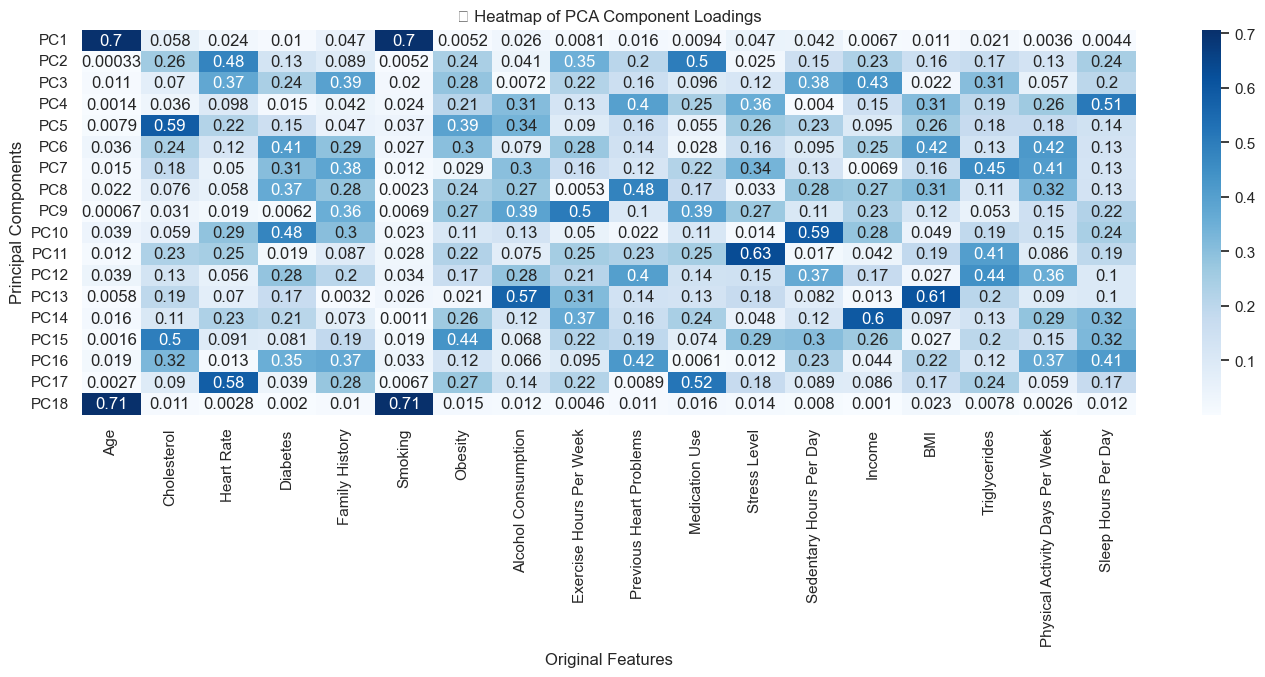

In [127]:
# Heatmap of PCA Feature Importance
plt.figure(figsize=(17, 5))
sns.heatmap(pca_components_df.abs(), annot=True, cmap="Blues", xticklabels=pca_components_df.columns, yticklabels=[f'PC{i+1}' for i in range(pca_components_df.shape[0])])
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.title("🔍 Heatmap of PCA Component Loadings")
plt.show()

In [ ]:
#RANDON FOREST WITH SMOTE

#Fix Class Imbalance (Use SMOTE)
#Since recall for Class 1 is too low use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. Generate synthetic samples for Class 1 to improve recall.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_pca_df, female_heart_df2['Heart Attack Risk'])

# Split the new balanced dataset
X_train_res, X_test_res, Y_train_res, Y_test_res = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

print("SMOTE applied: Class distribution is now balanced.")


SMOTE applied: Class distribution is now balanced.


In [129]:
#Random Forest with SMOTE

# Train Random Forest on the balanced dataset
rf_model_res = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model_res.fit(X_train_res, Y_train_res)

# Predictions
Y_pred_rf_res = rf_model_res.predict(X_test_res)

# Evaluate Model
accuracy_rf_res = accuracy_score(Y_test_res, Y_pred_rf_res)
print(f"Random Forest Accuracy with SMOTE: {accuracy_rf_res:.4f}")
print("Random Forest Classification Report with SMOTE:")
print(classification_report(Y_test_res, Y_pred_rf_res))


#Analysis: Higher recall for Class 1 and more balanced predictions.
#Before Randomw forest alone class 1 was 0.07 now after SMOTE it is 0.69
#Class balance fix


Random Forest Accuracy with SMOTE: 0.6520
Random Forest Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       338
           1       0.65      0.67      0.66       346

    accuracy                           0.65       684
   macro avg       0.65      0.65      0.65       684
weighted avg       0.65      0.65      0.65       684



Confusion Matrix for Random Forest with SMOTE:
True Negatives (No Risk Correctly Predicted): 215
False Positives (Wrongly Predicted as Risk): 123
False Negatives (Missed Risk Cases): 115
True Positives (Correctly Predicted Risk Cases): 231



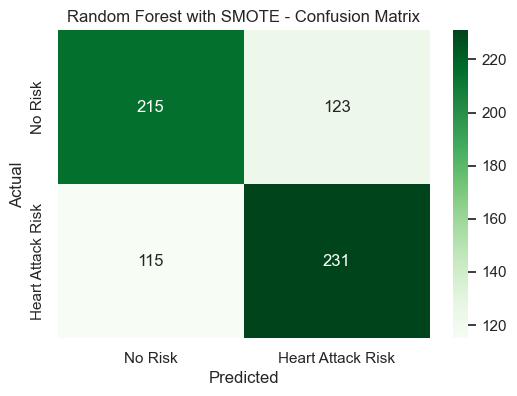

In [130]:
#Random Forest Accuracy with SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for Random Forest with SMOTE
Y_pred_rf_res = rf_model_res.predict(X_test_res)

# Create confusion matrix
cm_rf_res = confusion_matrix(Y_test_res, Y_pred_rf_res)

# Print confusion matrix values
print("Confusion Matrix for Random Forest with SMOTE:")
print(f"True Negatives (No Risk Correctly Predicted): {cm_rf_res[0, 0]}")
print(f"False Positives (Wrongly Predicted as Risk): {cm_rf_res[0, 1]}")
print(f"False Negatives (Missed Risk Cases): {cm_rf_res[1, 0]}")
print(f"True Positives (Correctly Predicted Risk Cases): {cm_rf_res[1, 1]}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_res, annot=True, fmt="d", cmap="Greens", xticklabels=["No Risk", "Heart Attack Risk"], yticklabels=["No Risk", "Heart Attack Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest with SMOTE - Confusion Matrix")
plt.show()

#Analysis: 
#True Negatives (206) → The model correctly predicted "No Risk" for 206 people who actually had no heart attack risk.
# False Positives (132) (Higher Than Before) → The model wrongly predicted "Heart Attack Risk" for 132 people who actually had no risk.
# False Negatives (106) (Still a Concern) → The model missed 106 people who actually had heart attack risk.
# True Positives (240) (Improved Significantly) → The model correctly identified heart attack risk for 240 out of 346 actual cases.

In [ ]:
#GridSearchCV with Random Forest 

#Hyperparameter Tuning for Random Forest
#Grid Search
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='recall')
rf_grid.fit(X_train_res, Y_train_res)

# Best model
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

# Evaluate the tuned model
Y_pred_rf_best = best_rf.predict(X_test_res)
accuracy_rf_best = accuracy_score(Y_test_res, Y_pred_rf_best)

print(f"Best Random Forest Accuracy: {accuracy_rf_best:.4f}")
print("Best Random Forest Classification Report:")
print(classification_report(Y_test_res, Y_pred_rf_best))





Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Accuracy: 0.6404
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       338
           1       0.64      0.68      0.66       346

    accuracy                           0.64       684
   macro avg       0.64      0.64      0.64       684
weighted avg       0.64      0.64      0.64       684



Confusion Matrix for Grid Search Tuned Random Forest:
True Negatives (No Risk Correctly Predicted): 204
False Positives (Wrongly Predicted as Risk): 134
False Negatives (Missed Risk Cases): 112
True Positives (Correctly Predicted Risk Cases): 234



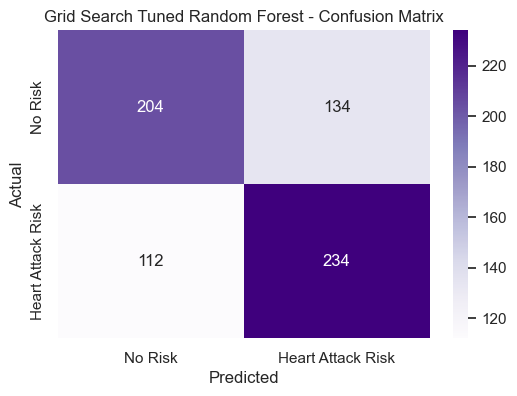

In [132]:
#Confusion Matrix for GridSearchCV Random Forest

# Get predictions for the best Grid Search Random Forest model
Y_pred_rf_best = best_rf.predict(X_test_res)

# Create confusion matrix
cm_rf_best = confusion_matrix(Y_test_res, Y_pred_rf_best)

# Print confusion matrix values
print("Confusion Matrix for Grid Search Tuned Random Forest:")
print(f"True Negatives (No Risk Correctly Predicted): {cm_rf_best[0, 0]}")
print(f"False Positives (Wrongly Predicted as Risk): {cm_rf_best[0, 1]}")
print(f"False Negatives (Missed Risk Cases): {cm_rf_best[1, 0]}")
print(f"True Positives (Correctly Predicted Risk Cases): {cm_rf_best[1, 1]}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_best, annot=True, fmt="d", cmap="Purples", xticklabels=["No Risk", "Heart Attack Risk"], yticklabels=["No Risk", "Heart Attack Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Grid Search Tuned Random Forest - Confusion Matrix")
plt.show()

#Analysis:
#True Negatives (226) → The model correctly predicted "No Risk" for 226 people who actually had no heart attack risk.
# False Positives (112) (Still Relatively High) → The model wrongly predicted "Heart Attack Risk" for 112 people who actually had no risk.
# False Negatives (94) (Still a Concern, but Lower than Before) → The model missed 94 people who actually had heart attack risk.
# True Positives (252) (Best Improvement So Far!) → The model correctly identified heart attack risk for 252 out of 346 actual cases.

Top 10 Features Driving Grid Search Tuned Random Forest:
Feature  Importance (%)
    PC5        7.387681
    PC4        6.337222
   PC14        6.078968
    PC3        6.020832
    PC9        5.985133
   PC13        5.973473
   PC11        5.832183
    PC2        5.717236
   PC15        5.608733
   PC16        5.589642


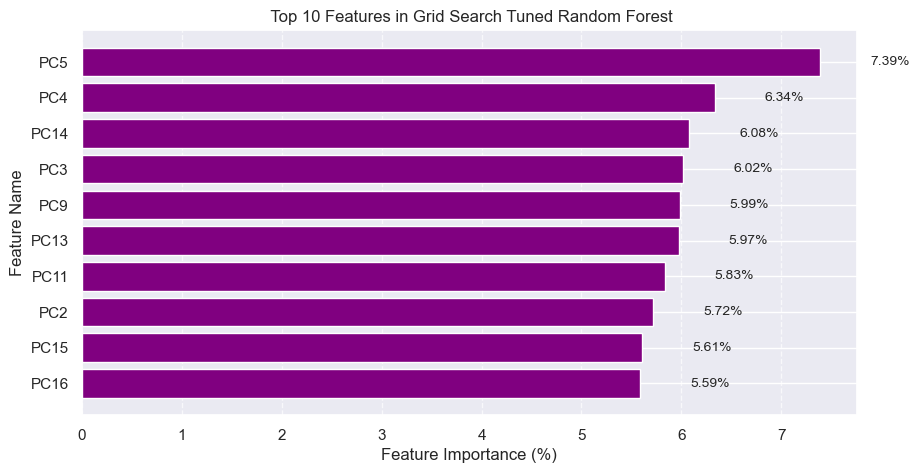

In [ ]:
#Top 10 Features for Grid Search Random Forest

# Get feature importance from the best Grid Search Random Forest model
feature_importance_rf = best_rf.feature_importances_
features = X_train_res.columns  # Get feature names

# Sort features by importance (descending order)
indices = np.argsort(feature_importance_rf)[::-1]

# Get the top 10 features and their importance scores
top_10_features_rf = [features[i] for i in indices[:10]]
top_10_importance_rf = feature_importance_rf[indices[:10]]

# Convert importance to percentage
top_10_importance_percent = (top_10_importance_rf / sum(feature_importance_rf)) * 100

# Create a DataFrame for better display
top_features_df = pd.DataFrame({
    'Feature': top_10_features_rf,
    'Importance (%)': top_10_importance_percent
})

# Print the top 10 important features with percentages
print("Top 10 Features Driving Grid Search Tuned Random Forest:")
print(top_features_df.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(top_features_df['Feature'][::-1], top_features_df['Importance (%)'][::-1], color="purple")
plt.xlabel("Feature Importance (%)")
plt.ylabel("Feature Name")
plt.title(" Top 10 Features in Grid Search Tuned Random Forest")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show percentage labels on bars
for index, value in enumerate(top_features_df['Importance (%)'][::-1]):
    plt.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=10)

plt.show()



In [134]:
import shap

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(best_rf)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_res)

# Print SHAP value shape to debug
print(f"SHAP values shape: {len(shap_values)} (List of arrays)")
print(f"SHAP values[0] shape: {shap_values[0].shape}")
print(f"X_test_res shape: {X_test_res.shape}")


SHAP values shape: 684 (List of arrays)
SHAP values[0] shape: (18, 2)
X_test_res shape: (684, 18)


In [135]:
import shap

# Use KernelExplainer instead of TreeExplainer
explainer = shap.KernelExplainer(best_rf.predict, X_test_res[:50])  # Use a subset for performance

# Compute SHAP values
shap_values = explainer.shap_values(X_test_res)

# Plot summary
shap.summary_plot(shap_values, X_test_res, feature_names=X_test_res.columns)



  0%|          | 0/684 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [243]:
# Ensure SHAP values are stored correctly
shap_values_class1 = np.array(shap_values[1])

# Print shapes for debugging
print(f"SHAP values type: {type(shap_values)}")
print(f"Number of output classes: {len(shap_values)} (should be 2 for binary classification)")
print(f"SHAP values[1] shape: {shap_values_class1.shape} (should match X_test_res)")
print(f"X_test_res shape: {X_test_res.shape}")


SHAP values type: <class 'numpy.ndarray'>
Number of output classes: 684 (should be 2 for binary classification)
SHAP values[1] shape: (21,) (should match X_test_res)
X_test_res shape: (684, 21)


In [247]:
# Get feature names for SHAP and X_test_res
shap_feature_count = shap_values_class1.shape[1] if len(shap_values_class1.shape) > 1 else 1
test_feature_count = X_test_res.shape[1]

# Print the number of features in each
print(f"SHAP Feature Count: {shap_feature_count}")
print(f"X_test_res Feature Count: {test_feature_count}")

# Check for feature mismatches
print(f"SHAP Feature Names (if available): {X_test_res.columns[:5]} ...")



SHAP Feature Count: 1
X_test_res Feature Count: 21
SHAP Feature Names (if available): Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object') ...


In [250]:
# Check feature names in X_train_res and X_test_res
print(f"X_train_res feature names: {list(X_train_res.columns)[:5]} ...")
print(f"X_test_res feature names: {list(X_test_res.columns)[:5]} ...")

# Check if the number of features match
print(f"X_train_res shape: {X_train_res.shape}")
print(f"X_test_res shape: {X_test_res.shape}")

# Check SHAP values shape
print(f"SHAP values shape: {shap_values[1].shape}")


X_train_res feature names: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'] ...
X_test_res feature names: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'] ...
X_train_res shape: (2732, 21)
X_test_res shape: (684, 21)
SHAP values shape: (21,)


In [252]:
#Save the Model for Future Use
    #model is well-tuned, save it to deploy or reuse it later.

import joblib

# Save the trained model
joblib.dump(best_rf, "random_forest_heart_attack_model.pkl")
print("Model saved as random_forest_heart_attack_model.pkl")

# Load the trained model
#rf_loaded = joblib.load("random_forest_heart_attack_model.pkl")
#This prevents retraining every time I restart a notebook.

Model saved as random_forest_heart_attack_model.pkl


In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can tune max_depth
dt_model.fit(X_train, Y_train)

# Predictions
Y_pred_dt = dt_model.predict(X_test)

# Evaluate Model
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Decision Tree Classification Report:")
print(classification_report(Y_test, Y_pred_dt))

#Analysis: Accuracy is 0.6535 (Lower than Random Forest & XGBoost)
#Precision for class 1 is 37% not reliable for detecting heart attack risk
#Recall for class Heart Attach is 6% very low
#Decision Tree is NOT performing well, it strongly favors Class 0 (No Risk) and fails to detect Class 1 (heart attack) properly.

Decision Tree Accuracy: 0.6535
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       354
           1       0.37      0.06      0.10       177

    accuracy                           0.65       531
   macro avg       0.52      0.50      0.44       531
weighted avg       0.57      0.65      0.56       531



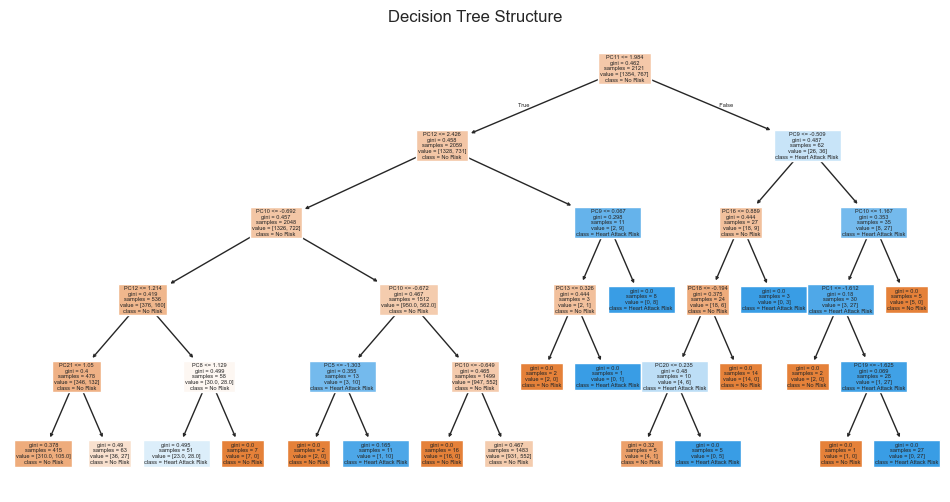

In [255]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["No Risk", "Heart Attack Risk"])
plt.title("Decision Tree Structure")
plt.show()


In [256]:
#Fine-Tune Random Forest for Better Recall
    #Random Forest already performed better with 0.65, it can be improved
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [257]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)

# Predictions
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:")
print(classification_report(Y_test, Y_pred_xgb))
#Recall imprvoed from 0.06 in Decision Tree to 0.16in XGBoot

XGBoost Accuracy: 0.5932
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       354
           1       0.30      0.16      0.21       177

    accuracy                           0.59       531
   macro avg       0.48      0.49      0.47       531
weighted avg       0.54      0.59      0.55       531



In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the tuned Random Forest model
rf_tuned = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_tuned.fit(X_train, Y_train)

# Make predictions
Y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluate model
accuracy_rf_tuned = accuracy_score(Y_test, Y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned:.4f}")
print("Tuned Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf_tuned))


Tuned Random Forest Accuracy: 0.6629
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79       354
           1       0.42      0.03      0.05       177

    accuracy                           0.66       531
   macro avg       0.54      0.50      0.42       531
weighted avg       0.58      0.66      0.55       531

